<a href="https://colab.research.google.com/github/hosein-jamshidian/Persian_Speech_to_Text/blob/main/persian_speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import os
import random
import shutil

In [2]:
!pip install python_speech_features # for feature extraction

!pip install python-Levenshtein

In [3]:
!unzip /content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Audios.zip

Archive:  /content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Audios.zip
  inflating: Persian-Speech-To-Text-Audios/12440123.wav  
  inflating: Persian-Speech-To-Text-Audios/12440124.wav  
  inflating: Persian-Speech-To-Text-Audios/12440126.wav  
  inflating: Persian-Speech-To-Text-Audios/12440127.wav  
  inflating: Persian-Speech-To-Text-Audios/12440128.wav  
  inflating: Persian-Speech-To-Text-Audios/12440129.wav  
  inflating: Persian-Speech-To-Text-Audios/12440130.wav  
  inflating: Persian-Speech-To-Text-Audios/12440135.wav  
  inflating: Persian-Speech-To-Text-Audios/12440141.wav  
  inflating: Persian-Speech-To-Text-Audios/12440143.wav  
  inflating: Persian-Speech-To-Text-Audios/12440145.wav  
  inflating: Persian-Speech-To-Text-Audios/12440146.wav  
  inflating: Persian-Speech-To-Text-Audios/12440147.wav  
  inflating: Persian-Speech-To-Text-Audios/12440155.wav  
  inflating: Persian-Speech-To-Text-Audios/12440156.wav  
  inflating: Persian-Speech-To-Text-Audios/1244

In [4]:
df=pd.read_excel('/content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Maps.xlsx')
df.head()

,audio,text
0,myaudio/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...
1,myaudio/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...
2,myaudio/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...
3,myaudio/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...
4,myaudio/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...


In [5]:
df.shape

(500, 2)

In [6]:
df.isnull().sum()

audio    0
text     0
dtype: int64

In [7]:
nums=[i for i in range(0,500)]
random.shuffle(nums)

In [8]:
train_size=int(len(nums)*.8)
val_size=int(len(nums)*.15)
test_size=int(len(nums)*.05)

train=nums[:train_size]
val=nums[train_size:(train_size+val_size)]
test=nums[(train_size+val_size):(train_size+val_size+test_size)]

In [9]:
df.loc[train,'datasplit']='train'
df.loc[val,'datasplit']='val'
df.loc[test,'datasplit']='test'

In [10]:
df['datasplit'].value_counts()

train    400
val       75
test      25
Name: datasplit, dtype: int64

In [11]:
!mkdir train
!mkdir test
!mkdir val

mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘val’: File exists


In [12]:
def move_files(row):
    if row['datasplit'] == 'train':
        row['audio'] = 'train/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'val':
        row['audio'] = 'val/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'test':
        row['audio'] = 'test/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' + row['audio'].split('/')[1], row['audio'])

    return row

In [13]:
df = df.apply(move_files, axis=1)

In [14]:
# Preprocessing

In [15]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav

from IPython.display import Audio
from IPython.display import display

In [16]:
sample = 'test/'
sample += os.listdir(sample)[0]

(rate,sig) = wav.read(sample)

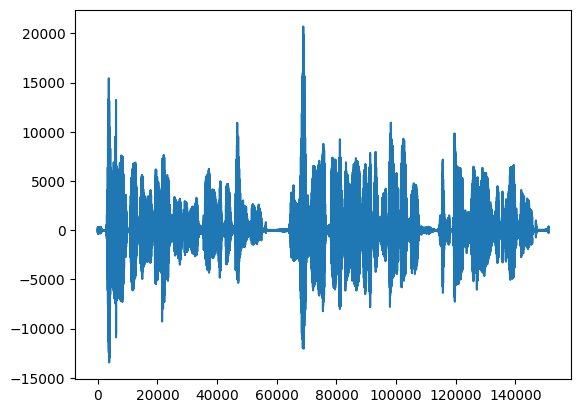

In [17]:
plt.plot(sig)
plt.show()

In [18]:
sample_audio= Audio(sample, autoplay=False)
display(sample_audio)

In [19]:
mfcc_features = mfcc(sig,rate)
print(mfcc_features.shape)

(944, 13)


In [20]:
df['MFCC features'] = None

In [21]:
df.head()

,audio,text,datasplit,MFCC features
0,test/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,test,None
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,None
2,train/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,train,None
3,test/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,test,None
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,None


In [22]:
for i in tqdm(range(500)):
    file_name = df.loc[i, 'audio']
    (rate,sig) = wav.read(file_name)
    mfcc_features = mfcc(sig,rate)
    df.loc[i, 'MFCC features'] = [mfcc_features]

<ipython-input-22-e269bd30e0a8>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(500)):


  0%|          | 0/500 [00:00<?, ?it/s]

In [23]:
df.head()

,audio,text,datasplit,MFCC features
0,test/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,test,"[[[11.534943707371909, -3.3702947057890777, -4..."
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,"[[[10.105730436984143, -2.4352324174037983, -3..."
2,train/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,train,"[[[9.91634332069268, -2.559946185140255, -4.98..."
3,test/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,test,"[[[11.225249404021213, -3.4068669440243875, -2..."
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,"[[[8.637159353566885, -2.7571319924894646, -5...."


In [24]:
unique_chars=pd.unique(list(df['text'].sum()))
unique_chars.sort()
unique_chars

array([' ', 'آ', 'أ', 'ئ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ',
       'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ل',
       'م', 'ن', 'ه', 'و', 'ً', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ی'],
      dtype=object)

In [25]:
#remove some charachters:

remove_char= {'آ':'ا',
              'أ':'ا',
              'ئ':'ی',
              unique_chars[30]:'ن'}

In [26]:
remove_charachters={ord(key):ord(remove_char[key]) for key in remove_char}
# ord(): function returns the number representing the unicode code of a specified character.

remove_charachters

{1570: 1575, 1571: 1575, 1574: 1740, 1611: 1606}

In [27]:
df['text']= df['text'].apply(lambda x : x.translate(remove_charachters))

In [28]:
# now the clear unique values.

unique_chars=pd.unique(list(df['text'].sum()))
unique_chars.sort()
unique_chars

array([' ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س',
       'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ل', 'م', 'ن', 'ه',
       'و', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ی'], dtype=object)

In [29]:
unique_chars = ['-', '', '', ''] + unique_chars.tolist()

In [30]:
char_to_int = {char: index for index, char in enumerate(unique_chars)}
int_to_char = {index: char for index, char in enumerate(unique_chars)}

In [31]:
# 0 for blank , 1 for padding , 2 for start , 3 for end.
#bayad befor, MFCC features dar biad banabarin az [np.array()] estefade kardam.

def tokenize(text):
  clean= [np.array([2]+[char_to_int[char] for char in text]+[3])]
  return clean

In [32]:
df['text_tokenized']= df['text'].apply(tokenize)

In [33]:
df.head()

,audio,text,datasplit,MFCC features,text_tokenized
0,test/12440123.wav,ابنبات های تومک را گرفت گفت ممنون پسرم نه من ...,test,"[[[11.534943707371909, -3.3702947057890777, -4...","[[2, 5, 6, 28, 6, 5, 7, 4, 29, 5, 36, 4, 7, 30..."
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,"[[[10.105730436984143, -2.4352324174037983, -3...","[[2, 25, 6, 26, 5, 4, 29, 27, 4, 6, 29, 4, 7, ..."
2,train/12440126.wav,می شد او را یک فیلسوف به حساب اورد او عاشق چیز...,train,"[[[9.91634332069268, -2.559946185140255, -4.98...","[[2, 27, 36, 4, 17, 12, 4, 5, 30, 4, 14, 5, 4,..."
3,test/12440127.wav,اگر تومک فراموش می کرد برایش ابنبات بیاورد درس...,test,"[[[11.225249404021213, -3.4068669440243875, -2...","[[2, 5, 35, 14, 4, 7, 30, 27, 34, 4, 24, 14, 5..."
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,"[[[8.637159353566885, -2.7571319924894646, -5....","[[2, 28, 5, 28, 4, 29, 5, 36, 4, 5, 12, 30, 36..."


## Dataset

In [34]:
import torch
from torch.utils.data import Dataset, DataLoader

In [35]:
df.iloc[0].to_dict()

{'audio': 'test/12440123.wav',
 'text': 'ابنبات های تومک را گرفت  گفت ممنون پسرم نه من هیچ وقت کار ندارم',
 'datasplit': 'test',
 'MFCC features': [array([[ 11.53494371,  -3.37029471,  -4.25456008, ...,   0.86670845,
            3.30492685,  -1.81752797],
         [  9.52315271,   3.94744387,  -8.41656807, ...,   6.82892904,
            6.1735962 ,   4.46501288],
         [ 10.0279746 ,   2.12419706, -11.54897459, ...,  15.44179426,
            9.16408181,  -1.64864382],
         ...,
         [  9.27767515,   0.07618757,  -9.46000787, ...,  -1.08366923,
           12.5950049 ,  17.7379736 ],
         [  8.81197544,   1.82406492,  -6.58570617, ...,  -7.84185061,
           15.34025943,  13.73292849],
         [  9.17644942,  -4.12734486,   0.23775852, ...,  -4.81752852,
           10.75281863,   9.80562286]])],
 'text_tokenized': [array([ 2,  5,  6, 28,  6,  5,  7,  4, 29,  5, 36,  4,  7, 30, 27, 34,  4,
         14,  5,  4, 35, 14, 24,  7,  4,  4, 35, 24,  7,  4, 27, 27, 28, 30,
     

In [36]:
class ASR_dataset(Dataset):
  def __init__(self, df, subset):
    super().__init__()

    self.df= df[df['datasplit']==subset].reindex()

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,i):
    row= self.df.iloc[i]
    return row['MFCC features'][0], row['text_tokenized'][0], row['text']

In [37]:
train_dataset= ASR_dataset(df, 'train')
val_dataset= ASR_dataset(df, 'val')
test_dataset= ASR_dataset(df, 'test')

In [38]:
train_dataset[0]

(array([[10.10573044, -2.43523242, -3.48773019, ..., -2.10563694,
          3.80705042,  3.18390945],
        [ 9.59862828, -0.12012222, -0.36289924, ..., -4.71947467,
         12.93114316, 10.07897565],
        [ 9.61711134, -2.51255407, -1.31842349, ..., -7.60372586,
         14.68854338, 10.74157941],
        ...,
        [10.83166995,  5.58072676,  2.48764895, ..., -0.09138547,
         15.48304158, 14.27564603],
        [10.82500743,  5.34542273,  1.00897503, ..., -3.4730588 ,
         11.157576  , 11.13680432],
        [10.26426063,  3.9814975 , -1.35845903, ...,  0.11174493,
          5.49190578, 12.10678835]]),
 array([ 2, 25,  6, 26,  5,  4, 29, 27,  4,  6, 29,  4,  7, 30,  4, 35, 24,
         7, 27,  4, 29, 36, 32,  4, 30, 25,  7, 27,  4,  5, 16,  7, 14,  5,
        10,  7,  4, 28, 12,  5, 14, 27,  4, 24, 25, 20,  4,  5, 36, 28,  4,
        15, 28, 12, 35, 36,  4, 14, 30,  4, 27, 36, 35, 13, 14, 30, 28, 27,
         3]),
 'قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط این زند

In [39]:
def pad_collate(batch):
  (xx,yy,texts)= zip(*batch)
  x_len= np.array([len(x) for x in xx])
  y_len= np.array([len(y) for y in yy])

  xx_pad= np.zeros((len(xx),max(x_len),xx[0].shape[1]))
  yy_pad= np.zeros((len(yy),max(y_len)))

  for i in range(len(xx)):
    xx_pad[i, :x_len[i],:]= xx[i]
    yy_pad[i,:y_len[i]]=yy[i]

  return torch.from_numpy(xx_pad),torch.from_numpy(yy_pad),torch.from_numpy(x_len),torch.from_numpy(y_len),texts

In [40]:
train_dataloader= DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=pad_collate, num_workers=2)
val_dataloader= DataLoader(val_dataset, batch_size=8, shuffle=True, collate_fn=pad_collate, num_workers=2)
test_dataloader= DataLoader(test_dataset, batch_size=8, shuffle=True, collate_fn=pad_collate, num_workers=2)

In [41]:
df.shape

(500, 5)

# Build model

In [42]:
from torch import nn

In [43]:
class ASR_base_model(nn.Module):
  def __init__(self):
    super(ASR_base_model,self).__init__()

    self.cnn= nn.Sequential(
        nn.Conv1d(in_channels=13, out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.Dropout(.2),
        nn.Conv1d(in_channels=32, out_channels=64, kernel_size=9, stride=1, padding=4),
        nn.ReLU(),
        nn.Dropout(.2)
        )

    self.rnn= None # must be specified
    self.cls=nn.Linear(in_features=128, out_features=36)

  def forward(self,z):
    #z.shape=(batch,seq,features=13)
    #cnn input must be (batch, features=13, seq)
    z= z.transpose(1,2)
    z= self.cnn(z)
    #z.shape=(batch, features=64, seq)

    #rnn input must be=(seq,batch,features)
    z= z.permute([2,0,1])
    z,_= self.rnn(z)
    # the z.shape is :(seq,batch,features=128)
    z= self.cls(z)

    return z

In [44]:
class ASR_rnn_model(ASR_base_model):
  def __init__(self):
    super(ASR_rnn_model,self).__init__()

    self.rnn= nn.RNN(input_size=64, hidden_size=128, num_layers =2, dropout=.2)

In [45]:
class ASR_lstm_model(ASR_base_model):
  def __init__(self):
    super(ASR_lstm_model,self).__init__()

    self.lstm=nn.LSTM(input_size=64, hidden_size=128, num_layer=2, dropout=.2)

In [46]:
class ASR_gru_model(ASR_base_model):
  def __init__(self):
    super(ASR_gru_model,self).__init__()

    self.gru= nn.GRU(input_size=64, hidden_size=128, num_layer=2, dropout=.2)

In [47]:
#test model

batch= next(iter(test_dataloader))
test_model= ASR_rnn_model()
output=test_model(batch[0].float())
print(output.shape)
#(seq,batch,features)

torch.Size([991, 8, 36])


# Training function

In [48]:
def decoder(emission, labels=int_to_char):
  items= torch.argmax(emission,dim=-1)
  #argmax index bozorgtarin meghdar ra peyda mikonad .
  #dim=1ya-1 index bozorgtarin meghdar dar har tensor ra barmigardanad bejaye bozorgtarin meghdar dar kol tensorha.
  items= torch.unique_consecutive(items,dim=-1)
  items= [i.item() for i in items if i>3]
  #i.items() faghat meghdar daroon tensor ra barmigardanad engar value ra midahad.
  items= "".join([labels[i] for i in items]).strip()
  return items

In [49]:
decoder(output[:,0,:], int_to_char)

'قحدوجغچصچپقگجپپرلپپقوذچجتوفدوجچقجوچپدچتدوچولجثوثپوصواوپدتندپدتخپهپگظپوتثوپچتدوپذخدطددپفقنتخچطودفپوفثودردطوپتنهودچنپفندچفطپخادهپهزثدندفدکدفودحدنطنهچفدوچندخدتنتندوفددوجچودثپنلدثتهزپطخاطدندصنوخکتلظطنفطثهندلدهننصفدپپدجدطپنخفنطفطثپدفپلپدطندفنوذپدزفدفنچگفندنطظددلفهدزطرکصوچپندنپننزصودنودفخپنددچفندچنندندوچدچدگنقوقوقجووثوذقوجوجدثچپصونفووچپچدچپدوقحثفدچوچدجفدذپنپجوپچپچپاداوطذوظذنجواچنپدوچاوچصچووزاقدصچوپذوچظتقپدذجچاپذپتزدذپوپوچپپلدچوپپظووداجصذپفجدفچوختندچخنچپفنفدفدونپچنچدچدثنوپفطپچطوپگدوچجوودخچپدطوپتقنپثنپنپثپنتتپثنپثنپنپثپثثنپثنپپنثنثتثنتپتپنثنثنثتنپثنثنثنتنثنثنثنثتنپثنثنپثتثپنپثثپتپنتنپثپنثتپنثثثثنپثتثننقپنثتنتثنثنپنثنثثنثنثنپثنثپنپثپثپثتنپنثپثنتپث'

In [50]:
def pad_texts(text1, text2, pad_char=' '):
  max_len= max(len(text1),len(text2))
  text1_padded= list(text1.ljust(max_len, pad_char))
  text2_padded= list(text2.ljust(max_len, pad_char))
  return text1_padded, text2_padded

In [51]:
from torch.utils.tensorboard import SummaryWriter
from torch.nn.functional import log_softmax

from sklearn.metrics import precision_recall_fscore_support

import Levenshtein as Lev

In [52]:
def train(model, epoch, dataloaders, criterion, optimizer, device, model_name):
  best_lev=0
  writer=SummaryWriter(f"logs/{model_name}")

  counter=0
  for epoch in tqdm(range(epoch)):
    model.train()
    #training mode.
    for sample in dataloaders['train']:
      optimizer.zero_grad()
      #Sets gradients of all model parameters to zero.

      model_input = sample[0].float().to(device)
      target= sample[1].float().to(device)
      input_lenghts= sample[2].to(device)
      target_lenghts= sample[3].to(device)

      prediction= model(model_input)
      loss= criterion(prediction.log_softmax(dim=-1), target, input_lenghts, target_lenghts)

      loss.backward()
      optimizer.step()

      writer.add_scalar('train/loss', loss.item(), counter)
      counter+=1

    #evaluation mode.
    model.eval()

    total_loss=0
    correct_count=0
    #for that text has been predicted correct.
    total_count=0
    cer=0
    chr_count=0
    lev=0
    precisions=[]
    recalls=[]
    f1_scores=[]

    for sample in dataloaders['val']:
      model_input= sample[0].float().to(device)
      target= sample[1].float().to(device)
      input_lenghts=sample[2].to(device)
      target_lenghts=sample[3].to(device)
      target_texts= sample[4]

      with torch.no_grad():
      # disabled gradient calculation.
      #when you are sure that you will not call Tensor.backward(). It will reduce memory consumption
        prediction=model(model_input)

        loss= criterion(prediction.log_softmax(dim=-1), target, input_lenghts, target_lenghts)
        total_loss+= loss.item()* prediction.size(0)
        #size(0) means: size(dim=0)

        for i in range(prediction.size(1)):
          predicted_text= decoder(prediction[:,i],int_to_char)

          if predicted_text == target_texts[i]:
            correct_count+=1

          total_count+=1

          cer += Lev.distance(predicted_text.replace(' ', ''), target_texts[i].replace(' ', ''))
          chr_count += max(len(predicted_text), len(target_texts[i]))

          #pad text to the same length:
          padded_target, padded_predicted = pad_texts(target_texts[i], predicted_text)

          #calculate precision, recall and f1_score:
          precision, recall, f1_score, _= precision_recall_fscore_support(padded_target,padded_predicted)
          precisions.extend(precision)
          recalls.extend(recall)
          f1_scores.extend(f1_score)

    writer.add_scalar('val/loss', total_loss / total_count, epoch)
    writer.add_scalar('val/acc', correct_count / total_count, epoch)
    writer.add_scalar('val/cer', cer / chr_count , epoch)
    writer.add_scalar('val/lev', lev / total_count , epoch)

    writer.add_scalar('val/precision', np.mean(precisions) , epoch)
    writer.add_scalar('val/recall', np.mean(recalls) , epoch)
    writer.add_scalar('val/f1_score', np.mean(f1_scores) , epoch)

    if (lev / total_count) > best_lev:
      best_lev= (lev / total_count)
      torch.save(model.state_dict(), 'temp.pth')

  model.load_state_dict(torch.load('temp.pth'))
  return model


# training RNN

In [53]:
model_rnn= ASR_rnn_model()

In [54]:
dataloaders={'train': train_dataloader,
             'val': val_dataloader}

criterion= nn.CTCLoss()

optimizer= torch.optim.Adam(model_rnn.parameters(), lr=.001)

device= torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

cuda:0


In [55]:
model_rnn= model_rnn.to(device)

In [56]:
model_rnn= train(model_rnn, 250, dataloaders, criterion, optimizer, device, 'RNN training')

<ipython-input-52-6396bcbdfa78>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(epoch)):


  0%|          | 0/250 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/li

FileNotFoundError: ignored